<a href="https://colab.research.google.com/github/shajeeraza12/Data-Visualization/blob/main/DataVis_CourseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
file_path = '/content/Traffic_Crashes_-_Crashes.csv'

df = pd.read_csv(file_path)

df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


# Number of crashes by weather condition

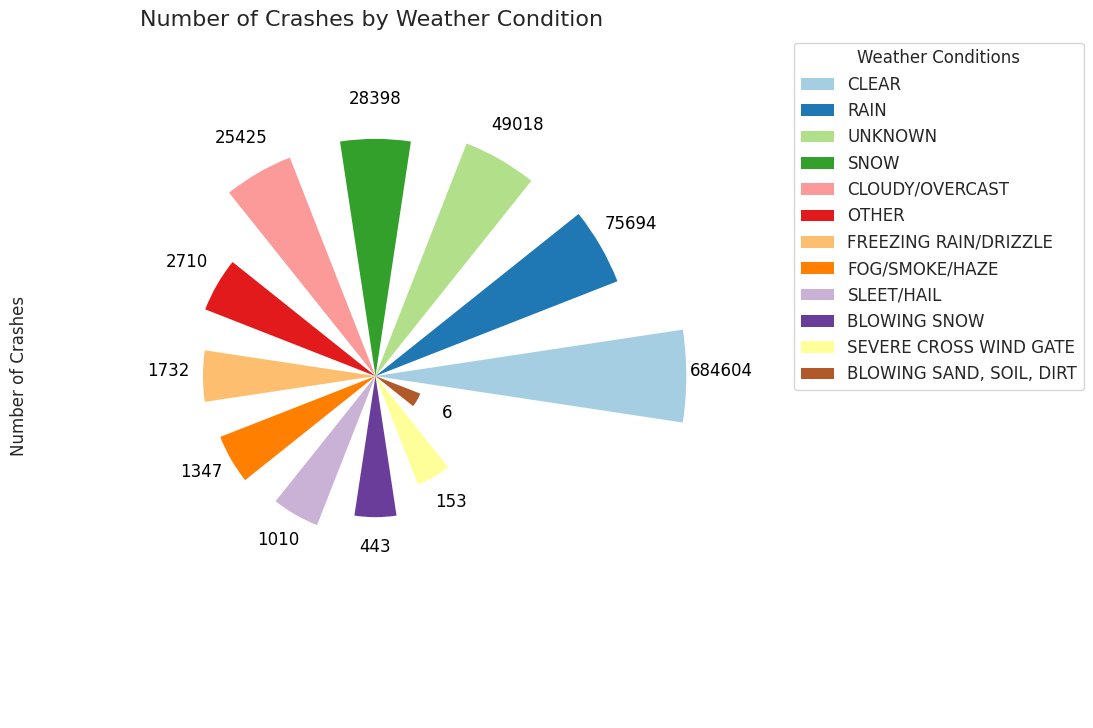

In [51]:
data = df[['WEATHER_CONDITION']]

#removing rows with missing values
data = data.dropna()

# Aggregating data
weather_counts = data['WEATHER_CONDITION'].value_counts().reset_index()
weather_counts.columns = ['Weather Condition', 'Crash Count']

# Creating a list of weather conditions and their respective crash counts
weather_conditions = weather_counts['Weather Condition']
crash_counts = weather_counts['Crash Count']

# Setting up the polar plot
num_conditions = len(weather_conditions)
angles = np.linspace(0, 2 * np.pi, num_conditions, endpoint=False).tolist()

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Normalizing crash counts using log scale (adding 1 to avoid log(0))
log_crash_counts = np.log(crash_counts + 1)

# Create the polar bar chart with log scale
bars = ax.bar(angles, log_crash_counts, width=0.3, color=sns.color_palette("Paired", num_conditions), align='center', edgecolor=None, linewidth=0)

# Set the angle labels (empty since we are using the legend)
ax.set_xticks(angles)
ax.set_xticklabels([''] * num_conditions)

# Remove spiral grid
ax.grid(False)

# Remove the outer circle (polar spine)
ax.spines['polar'].set_visible(False)

# Set y-axis ticks but hide the labels (keeping log scale)
ax.set_yticks([0, 1, 2, 3])
ax.set_ylim(0, np.max(log_crash_counts) * 1.1)

# Display the actual numeric values on the bars
for i, bar in enumerate(bars):
    # Get the angle and the height of the bar
    angle = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()

    # Compute the actual number of crashes (undo the log transformation)
    actual_crash_count = np.exp(height) - 1

    label_distance = height + 1.5

    ax.text(angle, label_distance, f'{int(actual_crash_count)}', horizontalalignment='center', fontsize=12, color='black')

# Hide y-axis labels (logarithmic scale will be applied)
ax.set_yticklabels([])

# Add a title and labels
ax.set_title('Number of Crashes by Weather Condition ', fontsize=16)
ax.set_ylabel('Number of Crashes', fontsize=12)

# Create the legend outside the plot with matching colors
legend_labels = [f'{weather_conditions[i]}' for i in range(num_conditions)]
ax.legend(bars, legend_labels, title='Weather Conditions', bbox_to_anchor=(1.1, 1), loc='upper left', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Crash trends over time

In [52]:
# Converting CRASH_DATE to datetime and extract month-year
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df['MONTH_YEAR'] = df['CRASH_DATE'].dt.to_period('M')

# Grouping by month-year and count crashes
line_data = df.groupby('MONTH_YEAR').size().reset_index(name='COUNT')
line_data['MONTH_YEAR'] = line_data['MONTH_YEAR'].astype(str)

# Creating an interactive line chart
fig = px.line(
    line_data,
    x='MONTH_YEAR',
    y='COUNT',
    title='Crash Trends Over Time',
    labels={'MONTH_YEAR': 'Month-Year', 'COUNT': 'Number of Crashes'}
)

fig.update_layout(
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    width=1280,
    height=720
)

fig.show()

Total Injuries by crash type

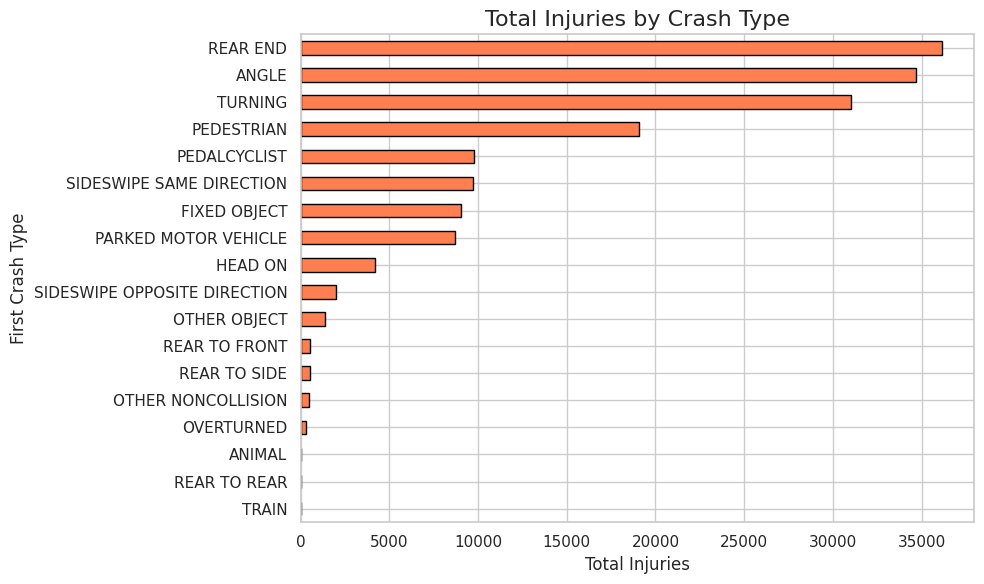

In [53]:
# Grouping data by first crash type and calculate total injuries
bar_data = df.groupby('FIRST_CRASH_TYPE')['INJURIES_TOTAL'].sum().sort_values()

# Creating a horizontal bar chart
plt.figure(figsize=(10, 6))
bar_data.plot(kind='barh', color='coral', edgecolor='black')

# Add titles and labels
plt.title('Total Injuries by Crash Type', fontsize=16)
plt.xlabel('Total Injuries', fontsize=12)
plt.ylabel('First Crash Type', fontsize=12)

plt.tight_layout()
plt.show()